In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras import models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

## Homework 06

Create 1000 images of size 20x20 with 0 everywhere except for a single 1 placed randomly. The input will be the above images, and the target the position of the 1 (two coordinates). Train a convolutional neural network, with mean squared error loss function.  Train the network until 85-90% of the positions of the points are predicted with less than 0.5 distance. Plot the points for which the predicted positions were farther than 0.5. Where are they?

### Dataset

In [2]:
N = 1000

images = np.zeros((N, 20, 20, 1))
positions = np.random.randint(20, size = (N, 2))

for i in range(N):
  [x_coord, y_coord] = positions[i]
  images[i][y_coord][x_coord][0] = 1

In [3]:
images.shape, positions.shape

((1000, 20, 20, 1), (1000, 2))

### Neural Network

In [4]:
# https://www.kaggle.com/danbrice/keras-plot-history-full-report-and-grid-search
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

In [39]:
classifier = Sequential()
c1 = Conv2D(32, (3,3), padding='same', input_shape = (20, 20, 1), activation = 'relu')
classifier.add(c1)
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten()) 
w1 = Dense(units = 25, activation = 'tanh')
w2 = Dense(units = 2, activation = 'relu')
classifier.add(w1)
classifier.add(w2)
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 10, 10, 32)        0         
                                                                 
 flatten_3 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 25)                80025     
                                                                 
 dense_7 (Dense)             (None, 2)                 52        
                                                      

In [40]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(images, positions, test_size=.2, random_state=42)

In [42]:
history = classifier.fit(X_train, y_train, batch_size=40, epochs=120, verbose=1, validation_data=(X_test, y_test))

Epoch 1/120
20/20 [==============================] - 1s 15ms/step - loss: 106.2530 - val_loss: 73.0324
Epoch 2/120
20/20 [==============================] - 0s 10ms/step - loss: 62.4275 - val_loss: 55.8222
Epoch 3/120
20/20 [==============================] - 0s 9ms/step - loss: 54.0040 - val_loss: 50.2375
Epoch 4/120
20/20 [==============================] - 0s 10ms/step - loss: 48.9314 - val_loss: 45.6984
Epoch 5/120
20/20 [==============================] - 0s 11ms/step - loss: 44.7624 - val_loss: 42.0125
Epoch 6/120
20/20 [==============================] - 0s 10ms/step - loss: 41.3223 - val_loss: 38.8585
Epoch 7/120
20/20 [==============================] - 0s 10ms/step - loss: 38.2005 - val_loss: 36.0235
Epoch 8/120
20/20 [==============================] - 0s 10ms/step - loss: 35.3783 - val_loss: 33.2914
Epoch 9/120
20/20 [==============================] - 0s 10ms/step - loss: 32.7513 - val_loss: 30.9446
Epoch 10/120
20/20 [==============================] - 0s 11ms/step - loss: 30.6043

In [43]:
def distance(p1, p2):
  [x1, y1] = p1
  [x2, y2] = p2
  return math.hypot(x2 - x1, y2 - y1)

In [44]:
# Check the percentage under 0.5 distance
predictions = classifier.predict(images)

distances = np.array([distance(predictions[i], positions[i]) for i in range(N)])

correct_prediction_percentage = sum(distances <= 0.5) * 100 / N

print("Predictions with distance under 0.5, in percentage:", correct_prediction_percentage)

32/32 [==============================] - 0s 3ms/step
Predictions with distance under 0.5, in percentage: 90.2


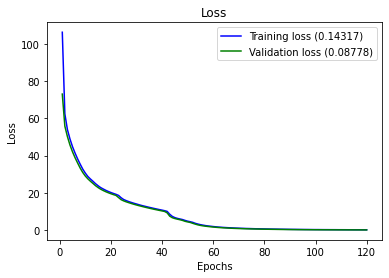

In [45]:
plot_history(history)

In [46]:
print("Predicted:\n", predictions[:10], "\nActual:\n", y_test[:10])

Predicted:
 [[17.909328  10.850412 ]
 [ 3.8986661  9.049936 ]
 [14.0483265 13.101026 ]
 [11.839716   5.948487 ]
 [ 4.898862  15.037253 ]
 [ 8.005808   5.1761856]
 [ 9.900958  10.236518 ]
 [ 6.938577  14.04653  ]
 [ 1.9725953  5.0828567]
 [18.226944   5.957479 ]] 
Actual:
 [[18 14]
 [19  4]
 [ 4  6]
 [ 8 13]
 [ 9  9]
 [ 9 19]
 [10 18]
 [18  4]
 [ 1  4]
 [13  1]]


In [47]:
z = np.zeros((2 * N,2),dtype=float)
t = np.zeros(2 * N,dtype=int)
z[:N] = positions
z[N:] = predictions
t[N:] = 1

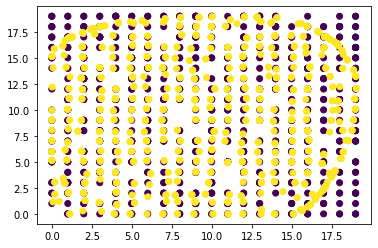

In [48]:
plt.scatter(z[:,0], z[:,1], c = t);

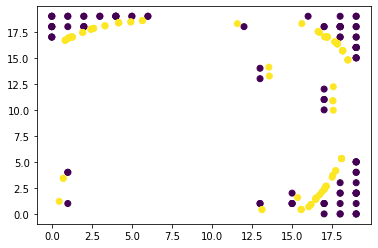

In [49]:
miss_points_indexes = distances > 0.5
miss_points_indexes = np.concatenate((miss_points_indexes, miss_points_indexes), axis=None)

miss_points = z[miss_points_indexes]
colors = t[miss_points_indexes]

plt.scatter(miss_points[:,0], miss_points[:,1], c = colors);

The convolutional neural network was very good at predicting the positions of the 1's except in the corners of the image, besides de initial corner where x and y are 0, which it had clearly a lot of difficulties.